In [ ]:
#packages
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime

In [ ]:
#  tickers (27 compagnies) and dates

tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'NVDA', 'V', 'JPM', 'UNH',
           'JNJ', 'BAC', 'WMT', 'PG', 'HD', 'MA', 'XOM', 'PFE', 'DIS', 'CVX',
           'KO', 'AVGO', 'PEP', 'CSCO', 'WFC', 'COST', 'LLY', 'ADBE']
start_time = datetime.datetime(2009, 12, 31)
end_time = datetime.datetime(2021, 12, 31)

In [ ]:

def get_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    return data

In [ ]:
 #We define the dataframe of daily returns
 price = pd.DataFrame(get_historical_data('AAPL', start_time, end_time))

 act_daily_ret_df=pd.DataFrame(index=price.index)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
############# Model training

In [ ]:
WEIGHTS = []
for ticker in tickers:

  # Get historical price data
  price_data = get_historical_data(ticker, start_time, end_time)


  # Calculate daily returns
  returns = price_data.pct_change().dropna()

  #Adj daily_retun dataframe
  act_daily_ret_df[ticker]=returns

  # Split data into features and target
  X = returns.iloc[:-1].values.reshape(-1, 1)  # Features (previous day's returns)
  y = returns.iloc[1:].values.reshape(-1, 1)   # Target (next day's returns)

  # Make copies of features and target
  X_copy = X.copy()
  y_copy = y.copy()

  # Split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

  # Standardize features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Initialize SVR model
  svr = SVR(kernel='linear', C=1.0)

  # Fit SVR model
  svr.fit(X_train_scaled, y_train.ravel())  # Use ravel() to convert y_train to 1D array

  # Predict returns for test set
  predicted_returns = svr.predict(X_test_scaled)

  # Calculate portfolio weights based on SVR coefficients
  weights = svr.coef_

  WEIGHTS.append(weights)
  #print("Optimized Portfolio Weight (SVR) for", ticker, ":", np.abs(weights),"\n")

# Normalize weights to sum up to 1
#normalized_weights = weights / np.sum(np.abs(weights))



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
act_daily_ret_df = act_daily_ret_df.iloc[1:, :]
act_daily_ret_df.tail()


,AAPL,MSFT,GOOG,AMZN,BRK-A,NVDA,V,JPM,UNH,JNJ,...,DIS,CVX,KO,AVGO,PEP,CSCO,WFC,COST,LLY,ADBE
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-23,0.003644,0.004472,0.001317,0.000184,0.000148,0.008163,-0.006148,0.003574,0.002530,0.001906,...,0.011522,0.002411,0.000687,0.014652,-0.001118,0.012189,0.006871,0.001274,0.024766,0.010000
2021-12-27,0.022975,0.023186,0.006263,-0.008178,0.005523,0.044028,0.004663,0.005723,0.008317,0.008440,...,-0.005403,0.020445,0.007386,0.014260,0.009954,0.018304,0.008478,0.023802,0.019443,0.014150
2021-12-28,-0.005767,-0.003504,-0.010914,0.005844,0.005502,-0.020133,0.001930,0.003035,0.006887,0.004008,...,0.015707,-0.001936,0.003922,-0.007831,0.005190,0.001735,-0.007177,0.002076,-0.007112,-0.014402
2021-12-29,0.000502,0.002051,0.000386,-0.008555,0.005632,-0.010586,0.000550,-0.000504,0.005249,0.007044,...,-0.002126,-0.005145,0.001189,0.005396,0.003539,0.006768,0.000620,0.005543,0.007199,-0.000123
2021-12-30,-0.006578,-0.007691,-0.003427,-0.003289,0.001323,-0.013833,-0.001375,-0.000504,-0.002275,0.004430,...,0.006844,-0.004409,-0.002884,-0.011195,-0.001734,-0.005316,-0.007224,-0.006798,-0.004202,0.002178


In [ ]:
act_daily_ret_df.tail()

,AAPL,MSFT,GOOG,AMZN,BRK-A,NVDA,V,JPM,UNH,JNJ,...,DIS,CVX,KO,AVGO,PEP,CSCO,WFC,COST,LLY,ADBE
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-23,0.003644,0.004472,0.001317,0.000184,0.000148,0.008163,-0.006148,0.003574,0.002530,0.001906,...,0.011522,0.002411,0.000687,0.014652,-0.001118,0.012189,0.006871,0.001274,0.024766,0.010000
2021-12-27,0.022975,0.023186,0.006263,-0.008178,0.005523,0.044028,0.004663,0.005723,0.008317,0.008440,...,-0.005403,0.020445,0.007386,0.014260,0.009954,0.018304,0.008478,0.023802,0.019443,0.014150
2021-12-28,-0.005767,-0.003504,-0.010914,0.005844,0.005502,-0.020133,0.001930,0.003035,0.006887,0.004008,...,0.015707,-0.001936,0.003922,-0.007831,0.005190,0.001735,-0.007177,0.002076,-0.007112,-0.014402
2021-12-29,0.000502,0.002051,0.000386,-0.008555,0.005632,-0.010586,0.000550,-0.000504,0.005249,0.007044,...,-0.002126,-0.005145,0.001189,0.005396,0.003539,0.006768,0.000620,0.005543,0.007199,-0.000123
2021-12-30,-0.006578,-0.007691,-0.003427,-0.003289,0.001323,-0.013833,-0.001375,-0.000504,-0.002275,0.004430,...,0.006844,-0.004409,-0.002884,-0.011195,-0.001734,-0.005316,-0.007224,-0.006798,-0.004202,0.002178


In [ ]:
act_daily_ret_df.to_csv('act_daily_ret_df.csv')

In [ ]:
# Dataframe of weights
W=[]
for i in range(len(tickers)):
  W.append(WEIGHTS[i][0])

df = pd.DataFrame(W, columns=['Weights'], index=tickers)


In [ ]:
df['Weights'].sum() # We will normalize the value in 0 and 1 and make the sum to be 1

-0.12807929996568906

In [ ]:
# reshape weights from 0 to 1 in a new column 'Weights1'
scaler = MinMaxScaler(feature_range=(0, 1))
weights = df["Weights"].values.reshape(-1, 1)
rescaled_weights = scaler.fit_transform(weights)
df["Weights1"] = rescaled_weights

# Normalize the weights such that the sum is 1
total_weights = df["Weights1"].sum()
df["Weights1"] = df["Weights1"] / total_weights

print(df)

        Weights  Weights1
AAPL  -0.011965  0.000000
MSFT  -0.006247  0.029325
GOOG  -0.010306  0.008509
AMZN  -0.000390  0.059367
BRK-A  0.000000  0.061367
NVDA  -0.001758  0.052352
V     -0.007100  0.024954
JPM   -0.005952  0.030842
UNH   -0.006096  0.030102
JNJ    0.000000  0.061367
BAC   -0.006309  0.029010
WMT   -0.008662  0.016940
PG     0.000000  0.061367
HD    -0.011712  0.001297
MA    -0.003140  0.045263
XOM   -0.001370  0.054338
PFE    0.000000  0.061367
DIS   -0.009549  0.012391
CVX   -0.005422  0.033558
KO     0.000000  0.061367
AVGO  -0.006805  0.026464
PEP   -0.004042  0.040634
CSCO  -0.008929  0.015571
WFC   -0.005751  0.031870
COST   0.000000  0.061367
LLY    0.000390  0.063367
ADBE  -0.006965  0.025644


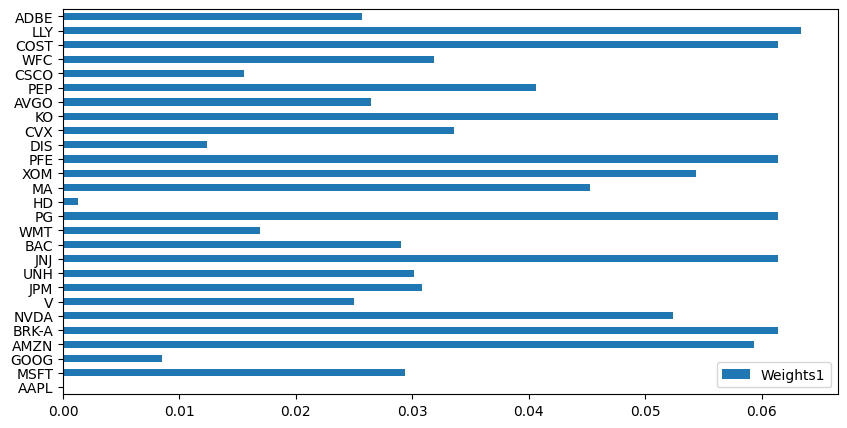

In [ ]:
###Weights of the portfolio

Weight_Pf = pd.DataFrame(df, columns=['Weights1'], index=tickers)
Weight_Pf.plot.barh(figsize=(10,5));

In [ ]:
Weight_Pf['Weights1'].sum()

1.0

In [ ]:
Weight_Pf

,Weights1
AAPL,0.000000
MSFT,0.029325
GOOG,0.008509
AMZN,0.059367
BRK-A,0.061367
NVDA,0.052352
V,0.024954
JPM,0.030842
UNH,0.030102
JNJ,0.061367


In [ ]:
#dataframe for daily portfolio returns
act_daily_port_ret_df = act_daily_ret_df.copy()
act_daily_port_ret_df.drop(columns=tickers, inplace=True)

In [ ]:
 #risk free return
risk_free_ret = 0.015

In [ ]:
# function for adding different portfolios
def add_portfolio(portfolio, weights):
    act_daily_port_ret_df[f'{portfolio} Return'] = act_daily_ret_df.dot(weights)
    if portfolio == 'Pred':
        # upper bound of security transaction tax: 0.0003
        act_daily_port_ret_df[f'{portfolio} Return'] = act_daily_port_ret_df[f'{portfolio} Return'] - 0.0003
    act_daily_port_ret_df[f'{portfolio} Cum Prod Return'] = (1 + act_daily_port_ret_df[f'{portfolio} Return']).cumprod()

    exp_ret = act_daily_port_ret_df[f'{portfolio} Return'].mean()
    std = act_daily_port_ret_df[f'{portfolio} Return'].std()
    sharpe_ratio = (exp_ret - risk_free_ret) / std

    print(portfolio)
    print('Weights:')
    print(weights)
    print(f'Expected Return: {exp_ret:.6f}')
    print(f'Standard Dev   : {std:.6f}')
    print(f'Sharpe Ratio   : {sharpe_ratio:.6f}')

In [ ]:
len(Weight_Pf)

27

In [ ]:
add_portfolio('Pred',Weight_Pf)


Pred
Weights:
       Weights1
AAPL   0.000000
MSFT   0.029325
GOOG   0.008509
AMZN   0.059367
BRK-A  0.061367
NVDA   0.052352
V      0.024954
JPM    0.030842
UNH    0.030102
JNJ    0.061367
BAC    0.029010
WMT    0.016940
PG     0.061367
HD     0.001297
MA     0.045263
XOM    0.054338
PFE    0.061367
DIS    0.012391
CVX    0.033558
KO     0.061367
AVGO   0.026464
PEP    0.040634
CSCO   0.015571
WFC    0.031870
COST   0.061367
LLY    0.063367
ADBE   0.025644
Expected Return: 0.000485
Standard Dev   : 0.010341
Sharpe Ratio   : -1.403629


In [ ]:
n_assets = len(tickers)
eq_weights = np.ones(n_assets) / n_assets

In [ ]:
eq=pd.DataFrame(eq_weights, index=tickers)
eq.to_csv('equally.csv')

In [ ]:
add_portfolio('Eq', eq_weights)

Eq
Weights:
[0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704]
Expected Return: 0.000822
Standard Dev   : 0.010826
Sharpe Ratio   : -1.309621


In [ ]:
sum(eq_weights)


0.9999999999999993

In [ ]:
#Grap Market Capitalization for each stock in portfolio
cap_data = {}
for t in tickers:
    stock = yf.Ticker(t)
    cap_data[t] = stock.info["marketCap"]

In [ ]:
cap_df = pd.DataFrame.from_dict(cap_data, orient='index', columns=['Market Cap'])
cap_df.index.name = 'Ticker'

In [ ]:
#cap_data = pdr.get_quote_yahoo(tickers)['marketCap']
#cap_df = pd.DataFrame(cap_data)
cap_df['Weight'] = cap_df['Market Cap']/ cap_df['Market Cap'].sum()
cap_weights = np.array(cap_df['Weight'])

In [ ]:
capital=pd.DataFrame(cap_weights, index=tickers)
capital.to_csv('capital.csv')

In [ ]:
add_portfolio('Cap', cap_weights)

Cap
Weights:
[0.13589654 0.14608336 0.10037976 0.09367326 0.04182937 0.10727915
 0.0265522  0.02644221 0.02189945 0.01736347 0.01407988 0.0233032
 0.01876046 0.01642241 0.01993061 0.02530713 0.00761128 0.01007682
 0.01427453 0.01294488 0.02862789 0.01170481 0.00922187 0.01010019
 0.01594622 0.03376166 0.01052739]
Expected Return: 0.001028
Standard Dev   : 0.012282
Sharpe Ratio   : -1.137601


In [ ]:
act_daily_port_ret_df

,Pred Return,Pred Cum Prod Return,Eq Return,Eq Cum Prod Return,Cap Return,Cap Cum Prod Return
Date,,,,,,
2010-01-04,0.010978,1.010978,0.012603,1.012603,0.009574,1.009574
2010-01-05,0.000492,1.011475,0.002285,1.014917,0.002301,1.011897
2010-01-06,0.000369,1.011849,-0.001360,1.013537,-0.005821,1.006007
2010-01-07,-0.001825,1.010002,0.000337,1.013878,-0.006304,0.999666
2010-01-08,-0.000568,1.009429,0.000094,1.013973,0.005125,1.004789
...,...,...,...,...,...,...
2021-12-23,0.003273,3.649902,0.003984,9.927349,0.004131,17.625559
2021-12-27,0.011408,3.691542,0.011742,10.043915,0.015428,17.897486
2021-12-28,-0.001522,3.685924,-0.000690,10.036984,-0.003487,17.835081


In [ ]:
# plotting parameters
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})

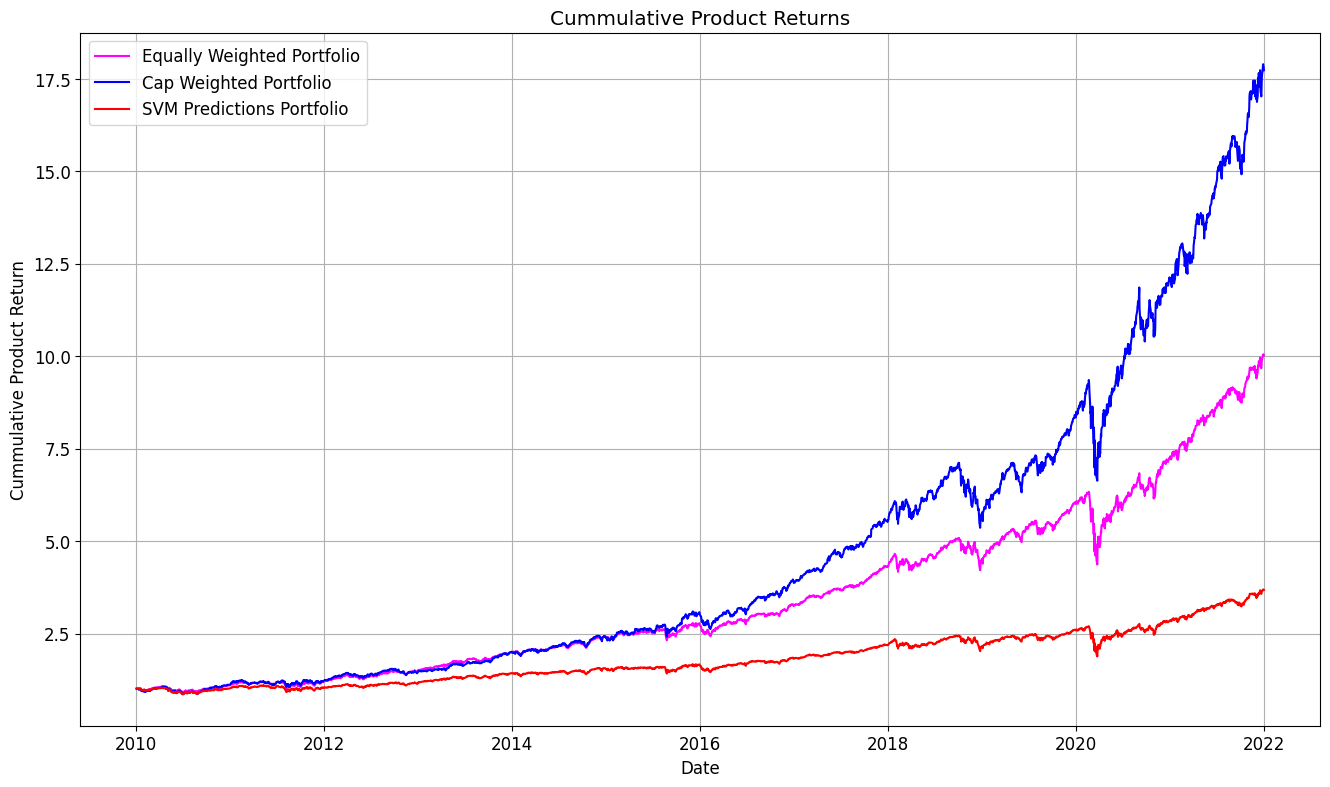

In [ ]:
plt.plot(act_daily_port_ret_df.index, act_daily_port_ret_df['Eq Cum Prod Return'],
         label='Equally Weighted Portfolio', color='fuchsia')
plt.plot(act_daily_port_ret_df.index, act_daily_port_ret_df['Cap Cum Prod Return'],
         label='Cap Weighted Portfolio', color='blue')
plt.plot(act_daily_port_ret_df.index, act_daily_port_ret_df['Pred Cum Prod Return'],
         label='SVM Predictions Portfolio', color='red')

plt.xlabel('Date')
plt.ylabel('Cummulative Product Return')
plt.title('Cummulative Product Returns')
#plt.ylim(0.9, 2)
plt.legend()
plt.show()

In [ ]:
####################################################
## We will now vary the parameters c  of the SVM model, in order to obtain a better return

In [ ]:
#Set of parameters we will use
cVals =  [0.00001,0.0001,0.001, 0.1, 1, 10,100]

In [ ]:
#Function to train the SVM function of the parameters value

def SVM_Weight(cval):
    WEIGHTS = []
    for ticker in tickers:

      # Get historical price data
      price_data = get_historical_data(ticker, start_time, end_time)


      # Calculate daily returns
      returns = price_data.pct_change().dropna()

      #Adj daily_retun dataframe
      act_daily_ret_df[ticker]=returns

      # Split data into features and target
      X = returns.iloc[:-1].values.reshape(-1, 1)  # Features (previous day's returns)
      y = returns.iloc[1:].values.reshape(-1, 1)   # Target (next day's returns)

      # Make copies of features and target
      X_copy = X.copy()
      y_copy = y.copy()

      # Split data into train and test sets
      X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

      # Standardize features
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)

      # Initialize SVR model
      svr = SVR(kernel='linear', C=cval)

      # Fit SVR model
      svr.fit(X_train_scaled, y_train.ravel())  # Use ravel() to convert y_train to 1D array

      # Predict returns for test set
      predicted_returns = svr.predict(X_test_scaled)

      # Calculate portfolio weights based on SVR coefficients
      weights = svr.coef_

      WEIGHTS.append(weights)
    return WEIGHTS

In [ ]:
# We will now deduice the portfolio weights for each SVM model

In [ ]:
df = pd.DataFrame(index=tickers)
W={}
for i in cVals:
    W[(i)]=SVM_Weight(i)
   # WEIGHTS=W[(i,j)]

    # Dataframe of weights
    We=[]
    for k in range(len(tickers)):
      We.append(W[(i)][k][0])

    #df = pd.DataFrame(We, columns=['Weights'], index=tickers)
    # reshape weights from 0 to 1 in a new column 'Weights1'
    scaler = MinMaxScaler(feature_range=(0, 1))
    weights = We#.reshape(-1, 1)
    rescaled_weights = scaler.fit_transform(weights)
    df["Weights1"] = rescaled_weights

    # Normalize the weights such that the sum is 1
    total_weights = df["Weights1"].sum()
    df[f"{i} Weight"] = df["Weights1"] / total_weights
df

In [ ]:
SVM=pd.DataFrame(df['1e-05 Weight'], index=tickers)
SVM.to_csv('SVM1e-05.csv')

In [ ]:

for i in cVals:
    add_portfolio(f'SVM{i}', df[f'{(i)} Weight'])

In [ ]:
act_daily_port_ret_df

In [ ]:
plt.plot(act_daily_port_ret_df.index, act_daily_port_ret_df['Cap Cum Prod Return'],
         label='Cap Weighted Portfolio', color='blue')
plt.plot(act_daily_port_ret_df.index, act_daily_port_ret_df['Eq Cum Prod Return'],
         label='Equally Weighted Portfolio', color='fuchsia')
plt.plot(act_daily_port_ret_df.index, act_daily_port_ret_df['Pred Cum Prod Return'],
         label='SVM1_transaction tax  Portfolio', color='red')
for i in cVals:
      plt.plot(act_daily_port_ret_df.index, act_daily_port_ret_df[f'SVM{i} Cum Prod Return'],
              label=f'SVM{i} Predictions Portfolio', )

plt.xlabel('Date')
plt.ylabel('Cummulative Product Return')
plt.title('Cummulative Product Returns')
#plt.ylim(0.9, 2)
plt.legend()
plt.show()